## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

model_ckpt1 = ModelCheckpoint(filepath="./tmp1.h5", 
                             monitor="val_loss",
                             save_weights_only = True,
                             save_best_only=True)

model_ckpt2 = ModelCheckpoint(filepath="./tmp2.h5", 
                             monitor="val_loss",
                             save_weights_only = False,
                             save_best_only=True)

In [8]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model_ckpts = [model_ckpt1, model_ckpt2]
results = {}
i = 1;
for mckpt in model_ckpts:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[mckpt]
         )
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"],
                              }
    i += 1

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 2s 37us/step - loss: 0.5709 - accuracy: 0.8325 - val_loss: 1.6126 - val_accuracy: 0.4880
Epoch 46/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.5545 - accuracy: 0.8371 - val_loss: 1.6185 - val_accuracy: 0.4906
Epoch 47/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.5399 - accuracy: 0.8418 - val_loss: 1.6615 - val_accuracy: 0.4906
Epoch 48/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.5237 - accuracy: 0.8502 - val_loss: 1.6524 - val_accuracy: 0.4878
Epoch 49/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.5067 - accuracy: 0.8575 - val_loss: 1.6575 - val_accuracy: 0.4825
Epoch 50/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.4892 - accuracy: 0.8637 - val_loss: 1.6908 - val_accuracy: 0.4859
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape

50000/50000 [==============================] - 2s 37us/step - loss: 0.6651 - accuracy: 0.7919 - val_loss: 1.5550 - val_accuracy: 0.4982
Epoch 41/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.6462 - accuracy: 0.8002 - val_loss: 1.5685 - val_accuracy: 0.4975
Epoch 42/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.6289 - accuracy: 0.8078 - val_loss: 1.5812 - val_accuracy: 0.4940
Epoch 43/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.6099 - accuracy: 0.8169 - val_loss: 1.5943 - val_accuracy: 0.4962
Epoch 44/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.5938 - accuracy: 0.8218 - val_loss: 1.6020 - val_accuracy: 0.4955
Epoch 45/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.5763 - accuracy: 0.8279 - val_loss: 1.6130 - val_accuracy: 0.4931
Epoch 46/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.5584 - accuracy: 0.8333 - val_loss: 1.6433

10000/10000 [==============================] - 1s 82us/step


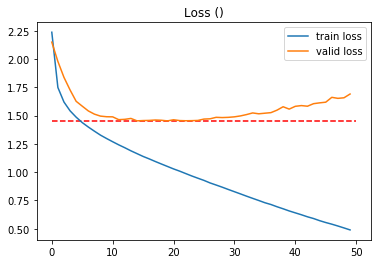

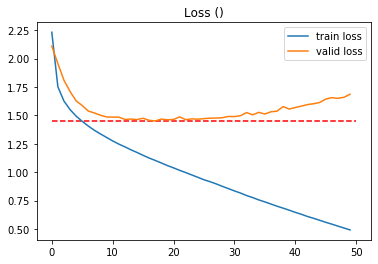

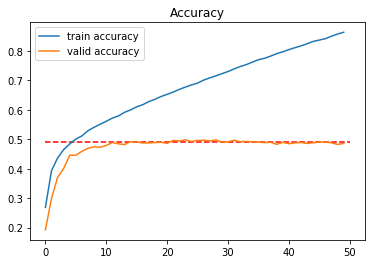

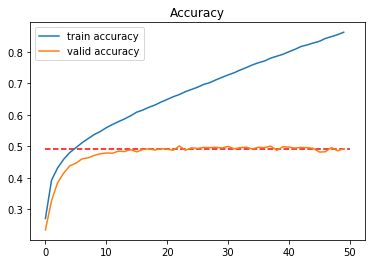

In [9]:
# Load back

model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.load_weights("./tmp1.h5")
loss_loadback1, acc_loadback1 = model.evaluate(x_test, y_test)

model = keras.models.load_model("./tmp2.h5")
loss_loadback2, acc_loadback2 = model.evaluate(x_test, y_test)

loss_loadback_s = [loss_loadback1, loss_loadback2]
acc_loadback_s = [acc_loadback1, acc_loadback2]

import matplotlib.pyplot as plt
%matplotlib inline

for i, k in enumerate(results.keys()):
    plt.plot(range(len(results[k]['train-loss'])), results[k]['train-loss'], label="train loss")
    plt.plot(range(len(results[k]['valid-loss'])), results[k]['valid-loss'], label="valid loss")
    plt.hlines(y=loss_loadback_s[i], xmin=0, xmax=len(results[k]['train-loss']), colors='r', linestyles='--')
    plt.legend()
    plt.title("Loss ()")
    plt.show()

for i, k in enumerate(results.keys()):
    plt.plot(range(len(results[k]['train-acc'])), results[k]['train-acc'], label="train accuracy")
    plt.plot(range(len(results[k]['valid-acc'])), results[k]['valid-acc'], label="valid accuracy")
    plt.hlines(y=acc_loadback_s[i], xmin=0, xmax=len(results[k]['train-acc']), colors='r', linestyles='--')
    plt.legend()
    plt.title("Accuracy")
    plt.show()